<a href="https://colab.research.google.com/github/usmanali9525/Image-Processing-Semester-Project/blob/main/Deep_Learning_Semester_Project_(Image_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
digits = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv")

labels = digits['label']
digits = np.array(digits.drop('label', axis=1)).astype('float')
digits.shape, labels.shape

((42000, 784), (42000,))

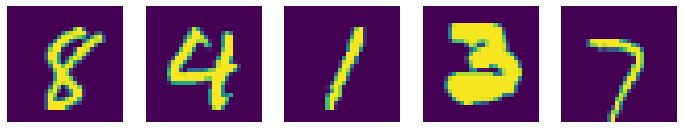

In [ ]:
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digits).reshape(28,28))
    plt.axis("off")

In [ ]:
split = 0.7, 0.3 # train, test
# normalize data
digits /= 255.0

split_ind = int(len(digits)*split[0])
X_train, X_test, y_train, y_test = digits[:split_ind], digits[split_ind:], labels[:split_ind], labels[split_ind:]
X_train.shape, X_test.shape

((29399, 784), (12601, 784))

In [ ]:
model = MLPClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")

Using MLPClassifier with the default parameter values gives an accuracy of 0.9750813427505753


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1271
           1       0.99      0.98      0.98      1429
           2       0.97      0.98      0.97      1213
           3       0.97      0.97      0.97      1310
           4       0.98      0.98      0.98      1184
           5       0.96      0.97      0.97      1129
           6       0.98      0.98      0.98      1225
           7       0.98      0.97      0.98      1342
           8       0.97      0.97      0.97      1238
           9       0.96      0.97      0.96      1260

    accuracy                           0.98     12601
   macro avg       0.97      0.98      0.97     12601
weighted avg       0.98      0.98      0.98     12601



In [ ]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1],
              'max_iter': [200, 500, 800],
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train[:3000], y_train[:3000]) # reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'max_iter': 200, 'learning_rate_init': 0.01, 'hidden_layer_sizes': 100, 'alpha': 0.01}


The accuracy score of the best model is 0.9343702880723752



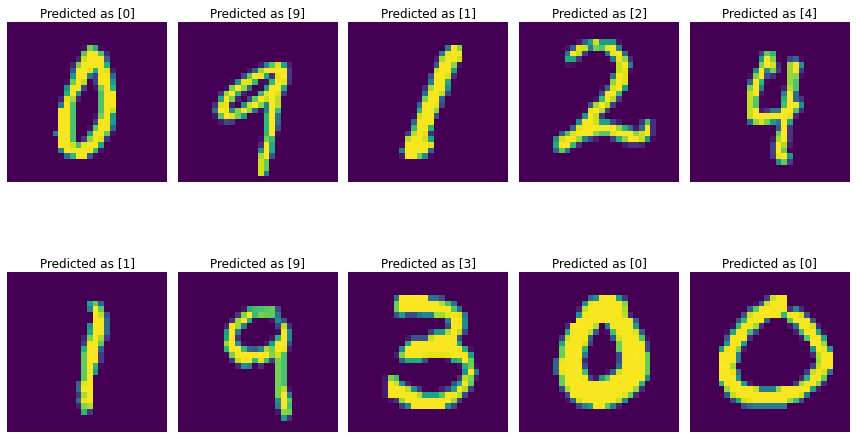

In [ ]:
y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = bestmodel.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()